In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [176]:
df = pd.read_csv("world_population.csv")
df.set_index("Country/Territory", inplace = True)


In [107]:
df.head()

,Rank,CCA3,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country/Territory,,,,,,,,,,,,,,,,
Afghanistan,36,AFG,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
Albania,138,ALB,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
Algeria,34,DZA,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
American Samoa,213,ASM,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
Andorra,203,AND,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [108]:
#escogemos las columnas, dado el index de country

df = df.loc[:, ['2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population']]

In [109]:
print(df)

                   2022 Population  2020 Population  2015 Population  \
Country/Territory                                                      
Afghanistan               41128771         38972230         33753499   
Albania                    2842321          2866849          2882481   
Algeria                   44903225         43451666         39543154   
American Samoa               44273            46189            51368   
Andorra                      79824            77700            71746   
...                            ...              ...              ...   
Wallis and Futuna            11572            11655            12182   
Western Sahara              575986           556048           491824   
Yemen                     33696614         32284046         28516545   
Zambia                    20017675         18927715         16248230   
Zimbabwe                  16320537         15669666         14154937   

                   2010 Population  2000 Population  1990 Popul

In [110]:
#despivotamos las columnas, convertimos a valores cada año para cada pais, mantenemos el index

unpivot = pd.melt(df,value_vars = ['2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population'], var_name = "Año", value_name = "Population", ignore_index = False)

In [111]:
#nuestro nuevo df es el despivotado

df = unpivot
df.head()

,Año,Population
Country/Territory,,
Afghanistan,2022 Population,41128771
Albania,2022 Population,2842321
Algeria,2022 Population,44903225
American Samoa,2022 Population,44273
Andorra,2022 Population,79824


# Ahora procedemos a quitar Population de la columna año #

In [112]:
df.info() #nos muestra la info de nuestro df 

<class 'pandas.core.frame.DataFrame'>
Index: 1872 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Año         1872 non-null   object
 1   Population  1872 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.9+ KB


In [113]:
df["Año"].unique() #solo es para ver los datos unicos

array(['2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population'], dtype=object)

In [114]:
#extraemos las letras del campo año para dejar solo el numero

df["Año"] = df.Año.str.extract('(\d+)') #\d+ es una expresion regular para extraer datos numericos
df["Año"] = df["Año"].astype(str).astype(int) #convertimos el extracto de objeto a numero
df.head()  

,Año,Population
Country/Territory,,
Afghanistan,2022,41128771
Albania,2022,2842321
Algeria,2022,44903225
American Samoa,2022,44273
Andorra,2022,79824


In [115]:
df.sort_values("Año") #ordenar valores en base al año (desc por defecto)
df.loc["Albania"]

,Año,Population
Country/Territory,,
Albania,2022,2842321
Albania,2020,2866849
Albania,2015,2882481
Albania,2010,2913399
Albania,2000,3182021
Albania,1990,3295066
Albania,1980,2941651
Albania,1970,2324731


In [116]:
al_col = df.loc[["Albania", "Colombia"]] #creamos una variable con solo dos paises
al_col = al_col.loc[:,"Population"] #creamos una variable tomando solo poblacion
print(al_col)

Country/Territory
Albania      2842321
Albania      2866849
Albania      2882481
Albania      2913399
Albania      3182021
Albania      3295066
Albania      2941651
Albania      2324731
Colombia    51874024
Colombia    50930662
Colombia    47119728
Colombia    44816108
Colombia    39215135
Colombia    32601393
Colombia    26176195
Colombia    20905254
Name: Population, dtype: int64


In [117]:
df.describe()

,Año,Population
count,1872.000000,1.872000e+03
mean,2000.875000,2.661274e+07
std,18.042541,1.133600e+08
min,1970.000000,5.100000e+02
25%,1987.500000,3.180410e+05
50%,2005.000000,4.225097e+06
75%,2016.250000,1.546753e+07
max,2022.000000,1.425887e+09


## Valor Maximo

In [118]:
df.min()

Año           1970
Population     510
dtype: int64

### Matplot


<AxesSubplot:xlabel='Año'>

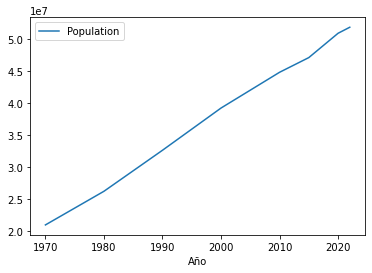

In [119]:
df.loc["Colombia"].plot(x = "Año", y = "Population")

Text(0.5, 1.0, 'Este es el titulo')

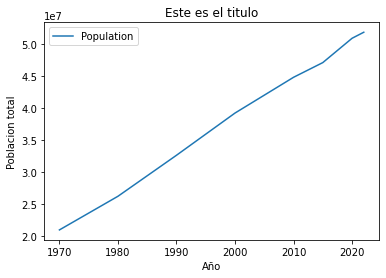

In [120]:
df.loc["Colombia"].plot(x = "Año", y = "Population")
plt.ylabel("Poblacion total") #nombre de eje y
plt.title("Este es el titulo") #nombre del titulo

In [121]:
Col = df.loc[["Colombia"],["Population"]]
print(Col)

                   Population
Country/Territory            
Colombia             51874024
Colombia             50930662
Colombia             47119728
Colombia             44816108
Colombia             39215135
Colombia             32601393
Colombia             26176195
Colombia             20905254


<Figure size 432x288 with 0 Axes>

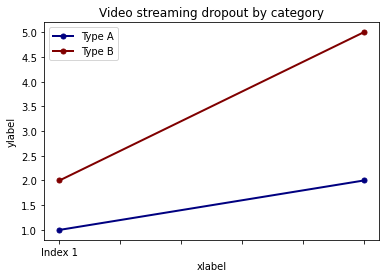

In [122]:
plt.figure()
values = [[1, 2], [2, 5]]
df2 = pd.DataFrame(values, columns=['Type A', 'Type B'], 
                   index=['Index 1', 'Index 2'])
df2.plot(lw=2, colormap='jet', marker='.', markersize=10,
         title='Video streaming dropout by category')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.show()

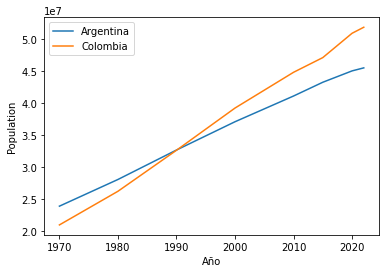

In [123]:
df_col_ar = df.loc[["Colombia", "Argentina"]]  #mi variable para comparar paises
fig, ax = plt.subplots() #expresion comun 

for pais, datos in df_col_ar.groupby("Country/Territory"):
    ax.plot(datos["Año"], datos["Population"], label=pais)
    
ax.legend()
ax.set_xlabel("Año")
ax.set_ylabel("Population")
plt.show()

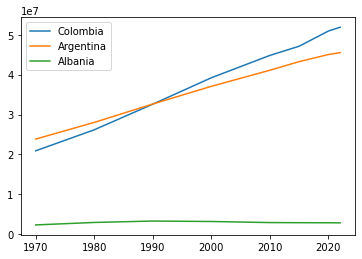

In [124]:
df_col = df.loc["Colombia"]
df_arg = df.loc["Argentina"]
df_alb = df.loc["Albania"]

plt.plot(df_col["Año"], df_col["Population"], label = "Colombia") #se elige el eje x & y dado el dataframe
plt.plot(df_arg["Año"], df_arg["Population"], label = "Argentina")
plt.plot(df_alb["Año"], df_alb["Population"], label = "Albania")

#plt.xlabel("Año")
#plt.ylabel("Poblacion")
#plt.title("Mi primera grafica gracias GPT")

plt.legend()
plt.show()

# # Grafico de barras

Digite el pais: Colombia


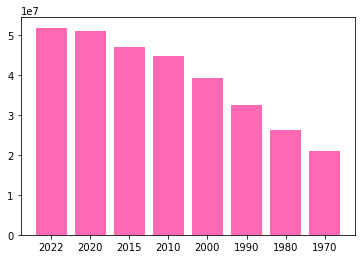

In [125]:
df["Año"] = df["Año"].astype(str) #convertimos a str para que distribuya x de manera homogenea
pais = df.loc[input("Digite el pais: ")] #para elegir el pais (en realidad es crear un nuevo df)
y = pais["Population"]
x = pais["Año"]

plt.bar(x,y, color = "hotpink", width = bar)
ax.legend(loc = "upper right", fontsize = 14)

plt.show()

# #Ahora un grafico de Pychart con otra columna, acá se resumirá todo el proceso anterior en el que hice otras cosas por hacer

In [223]:
df2 = pd.read_csv("world_population.csv")
df2 = df2.to_dict(orient = 'records')  #convirtiendo los datos a diccionario
df2 = list(filter(lambda x: x["Continent"] == "South America", df2)) #filtrando por un continente

In [224]:
paises = list(map(lambda x: x["Country/Territory"], df2))
percentages = list(map(lambda x: x["World Population Percentage"], df2))

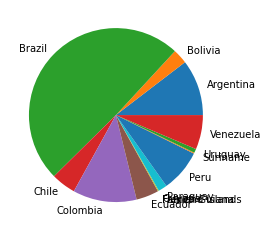

In [225]:
plt.pie(percentages, labels = paises)
plt.show()